<a href="https://colab.research.google.com/github/bbberylll/ESAA/blob/main/YB_5_16_%EC%84%B8%EC%85%98_%EC%97%B0%EC%8A%B5%EB%AC%B8%EC%A0%9C_%ED%9A%8C%EA%B7%802.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. 규제 선형 회귀 모델/ 회귀 트리**
- 릿지 회귀모델 및 회귀 트리를 이용하여 전복의 나이를 예측해 보세요.

- 전복의 ‘성별’, ‘키’, ‘지름’, ‘높이’, ‘전체무게’, ‘몸통무게’, ‘내장무게’, ‘껍질무게’를 이용해 ‘껍질의 고리수’를 예측한 뒤, **예측된 ‘껍질의 고리수’에 1.5를 더하면 전복의 나이**가 됩니다.

In [57]:
# 기본 모듈 불러오기
import numpy as np
import pandas as pd
from google.colab import drive

import warnings
warnings.filterwarnings(action='ignore')
drive.mount('/content/drive')
warnings.filterwarnings("ignore", category=RuntimeWarning)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 1) 데이터 불러오기 및 데이터 선택

In [58]:
# 데이터 로드
data = pd.read_csv('/content/drive/MyDrive/ESAA/F08 session_assignment/abalone.csv')

# 성별 M은 Male, F는 Female, I는 Infant 이므로 따로 열 만들기
for label in "MFI":
    data[label] = data["Sex"] == label
data.drop('Sex', axis=1, inplace=True)

# X,y 데이터 선택
y = data.Rings.values
data.drop('Rings', axis=1, inplace=True)

X = data.values.astype(float)

## 2) train/test 분리
: 테스트 셋과 데이터 셋을 7:3 비율로 분리하세요.

In [51]:
# 필요한 모듈 불러오기
from sklearn.model_selection import train_test_split



In [60]:
# train과 test set 분리 (train:test = 7:3 비율로)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=156)

## 3) 릿지 모델을 이용한 모델링
: 릿지 모델을 이용하여 전복의 나이를 예측해 보고 결과를 평가해 보세요.

 3-1) 릿지모델 생성, 교차검증, 평가에 필요한 모듈을 불러오세요.

In [6]:
#필요한 모듈 불러오기
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
import numpy as np

3-2) 릿지 모델을 생성하고 훈련하여 MSE와 RMSE를 구하세요. 릿지 모델 생성 시  alpha는 0.3으로 설정합니다. (교차 검증 하지 않습니다.)

In [25]:
#릿지모델 생성 및 훈련
ridge = Ridge(alpha=0.3, random_state=156)
ridge.fit(X_train, y_train)

#예측값 구하기
y_pred = ridge.predict(X_test)


#구한 예측값을 활용해 최종적으로 전복의 나이 예측
y_age = y_pred+1.5

#MSE와 RMSE구하기
mse = mean_squared_error(y_test, y_age)
rmse = np.sqrt(mse)

print("MSE:", mse)
print("RMSE:", rmse)

MSE: 7.151312455778389
RMSE: 2.6741937954790016


3-3) 교차검증을 이용하여 0, 0.1, 1, 10, 100 중  모델 성능이 가장 좋게 나오는 (rmse가 최소가 되는) alpha를 구하세요.

In [8]:
# 주어진 alpha
alphas=[0, 0.1, 1, 10, 100]

In [27]:
#alphas list 값을 반복하면서 alpha에 따른 평균 rmse를 구함

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    neg_mse_scores = cross_val_score(ridge, X, y, scoring='neg_mean_squared_error', cv=5)
    rmse_scores = np.sqrt(-neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)

    print(f"3-3) alpha={alpha} 평균 RMSE: {avg_rmse}")
  #cross_val_score를 이용해 5 폴드의 평균 RMSE를 계산


3-3) alpha=0 평균 RMSE: 2.244617415600131
3-3) alpha=0.1 평균 RMSE: 2.2371368259830495
3-3) alpha=1 평균 RMSE: 2.230321200422364
3-3) alpha=10 평균 RMSE: 2.3372805091310007
3-3) alpha=100 평균 RMSE: 2.621188059927813


## 4) XGBRegressor을 이용한 모델링
: XGBRegressor 모델을 이용하여 전복의 나이를 예측해 보고 결과를 평가해 보세요.

4-1) XGBRegressor 훈련, 평가에 필요한 모듈을 불러오세요.

In [47]:
# 필요한 모듈 임포트
from xgboost import XGBRegressor, plot_importance
from sklearn.metrics import mean_squared_error
import numpy as np

4-2) XGBregressor 모델을 생성하고 훈련하여 MSE와 RMSE를 구하세요.

In [61]:
#모델 생성 및 훈련
xgb_model = XGBRegressor(random_state=156)
xgb_model.fit(X_train, y_train)

#예측값 구하기
y_pred2 = xgb_model.predict(X_test)

#구한 예측값을 활용해 최종적으로 전복의 나이 예측
y_age2 = y_pred2+1.5

#MSE와 RMSE 구하기
mse2 = mean_squared_error(y_test, y_age2)
rmse2 = np.sqrt(mse2)

print("MSE:", mse2)
print("RMSE:", rmse2)


MSE: 7.572315692901611
RMSE: 2.751784092711783


4-3) 생성한 모델의 피처 중요도를 시각화해보세요.

<Figure size 1000x600 with 0 Axes>

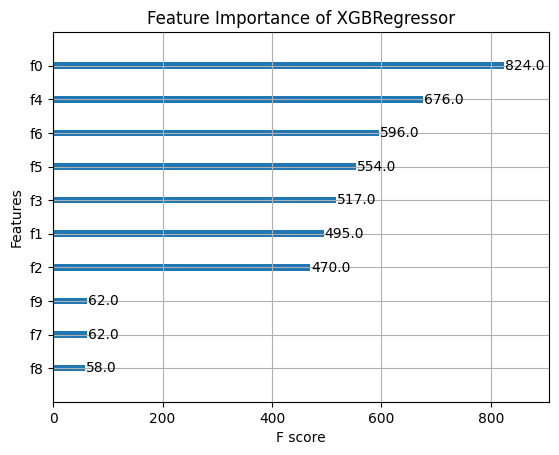

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10, 6))
plot_importance(xgb_model)
plt.title("Feature Importance of XGBRegressor")
plt.show()


---

# **2. 로지스틱 회귀분석**
load_wine() 함수를 이용하여 와인 데이터를 다항분류하는 로지스틱 회귀모델을 생성하세요.

In [80]:
# 필요한 모듈 불러오기
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

## 1) 데이터 불러오기 및 변수 선택

In [81]:
wine = load_wine()

wine_x = wine.data # x변수
wine_y = wine.target # y변수

## 2) train/test 셋 분리

In [87]:
x_train, x_test, y_train, y_test = train_test_split(wine_x, wine_y, test_size=0.3, random_state=100)

x_train.shape
y_train.shape

(124,)

## 3) 로지스틱 회귀모델을 이용한 모델링

3-1) 로지스틱 회귀모델을 생성하여 훈련하세요.

In [88]:
log_reg = LogisticRegression(random_state=42)
log_reg.fit(x_train, y_train)

LogisticRegression(random_state=42)

3-2) 회귀 모델의 기울기와 절편을 구하세요.

In [89]:
#기울기
print("기울기:\n", log_reg.coef_)


기울기:
 [[-0.13399768  0.16586833  0.08428524 -0.28323718 -0.0185657   0.1656
   0.31910469 -0.03028428  0.08456708 -0.15917071 -0.00996051  0.2177484
   0.01086909]
 [ 0.29813833 -0.58602558 -0.08147589  0.20461109 -0.00570224  0.18424907
   0.32205696  0.01695928  0.17612779 -0.81100094  0.16523156  0.30017883
  -0.00479224]
 [-0.16414065  0.42015725 -0.00280935  0.07862609  0.02426794 -0.34984907
  -0.64116165  0.013325   -0.26069487  0.97017165 -0.15527105 -0.51792723
  -0.00607685]]


In [85]:
#절편
print("절편:\n", log_reg.intercept_)

절편:
 [-0.0558771  0.1107866 -0.0549095]


3-3) 모델의 정확도를 구하세요.

In [90]:
from sklearn.metrics import accuracy_score

#모델의 예측값 구하기
y_pred = log_reg.predict(x_test)

#모델의 정확도 구하기
accuracy = accuracy_score(y_test, y_pred)
print("정확도:", accuracy)


정확도: 0.9629629629629629
